## Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from wordcloud import WordCloud

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/sms-spam-collection-dataset/spam.csv


## Load and prepare the Dataset

In [2]:
df = pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv",encoding='latin-1')
df = df[['v1','v2']]
df.columns = ['label','message']
df['label_num'] = df['label'].map({'ham':0,'spam':1})
df

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [3]:
df.describe()

,label_num
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      5572 non-null   object
 1   message    5572 non-null   object
 2   label_num  5572 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


In [5]:
duplicate_rows = df.duplicated().sum()
print(f'Total duplicate rows = {duplicate_rows}')

Total duplicate rows = 403


In [6]:
print(df.isnull().sum())

label        0
message      0
label_num    0
dtype: int64


## Class Distribution visualization

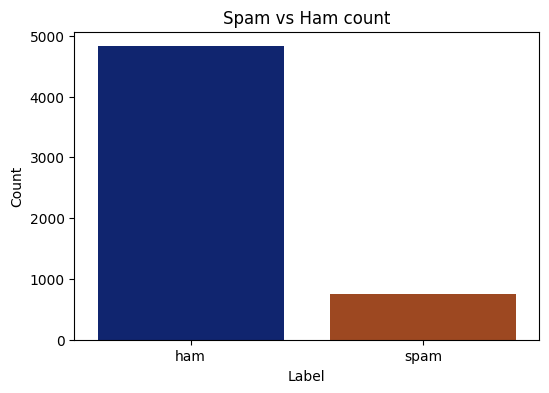

In [7]:
# Countplot
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='label',palette='dark')
plt.title('Spam vs Ham count')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

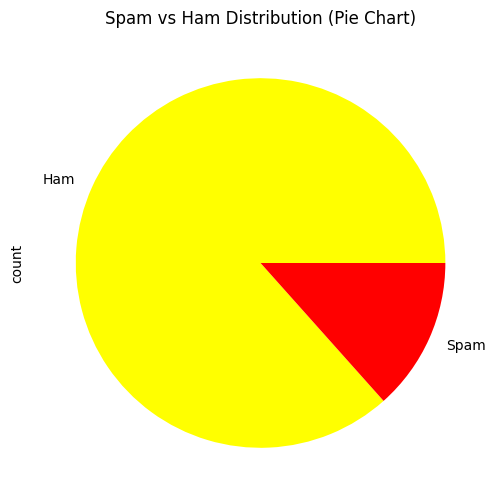

In [8]:
# Pie Chart
plt.figure(figsize=(6, 6))
df['label'].value_counts().plot.pie(labels=["Ham", "Spam"], colors=["yellow", "red"])
plt.title("Spam vs Ham Distribution (Pie Chart)")
plt.show()

In [9]:
# Add message length columns
df['message_length'] = df['message'].apply(len)

In [10]:
df

,label,message,label_num,message_length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,161
5568,ham,Will Ì_ b going to esplanade fr home?,0,37
5569,ham,"Pity, * was in mood for that. So...any other s...",0,57
5570,ham,The guy did some bitching but I acted like i'd...,0,125


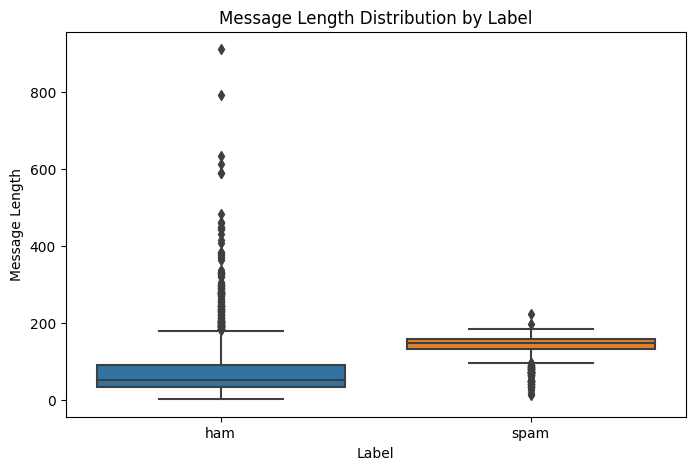

In [11]:
# Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(data=df,x='label',y='message_length')
plt.title("Message Length Distribution by Label")
plt.xlabel("Label")
plt.ylabel("Message Length")
plt.show()

In [12]:
X = df['message']
y = df['label_num']  # Now encoded with LabelEncoder

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [13]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)


MultinomialNB()

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['label_num'] = le.fit_transform(df['label'])  # 'ham' → 0, 'spam' → 1


In [15]:
y_pred = model.predict(X_test_tfidf)

# Classification report and accuracy
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))
print("Accuracy Score:", accuracy_score(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115

Accuracy Score: 0.9668161434977578


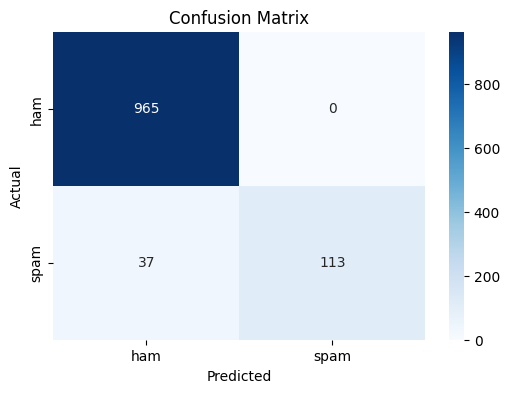

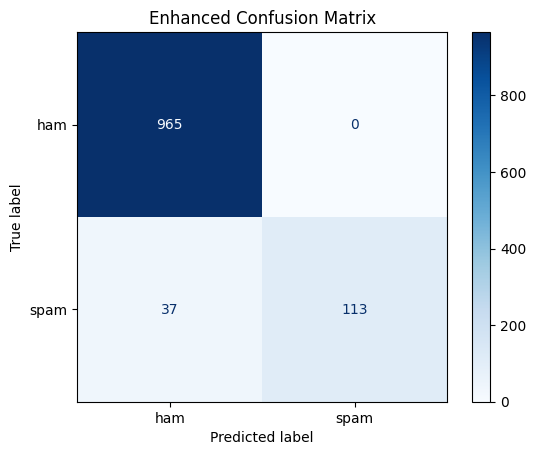

In [16]:
# Confusion matrix (heatmap)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Display version
ConfusionMatrixDisplay.from_estimator(model, X_test_tfidf, y_test,
                                      display_labels=le.classes_,
                                      cmap='Blues',
                                      values_format='d')
plt.title("Enhanced Confusion Matrix")
plt.show()


## Now we have to test this model to analyze the accuracy of the model by inputting custom made messages 

In [17]:
sample_messages = [
    "Hey, how are you doing today?",
    "Claim your FREE voucher now!!!",
    "Reminder: Your appointment is tomorrow at 10 AM.",
    "Winner! You have been selected for a cash reward.",
    "Hello, Iam busy at my work"
]

sample_vectors = tfidf.transform(sample_messages)
predictions = model.predict(sample_vectors)
labels = le.inverse_transform(predictions)

# Show results
for msg, lbl in zip(sample_messages, labels):
    print(f" {msg} => [{lbl.upper()}] ")


 Hey, how are you doing today? => [HAM] 
 Claim your FREE voucher now!!! => [SPAM] 
 Reminder: Your appointment is tomorrow at 10 AM. => [HAM] 
 Winner! You have been selected for a cash reward. => [SPAM] 
 Hello, Iam busy at my work => [HAM] 
